In [1]:
import warnings

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler


warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 100)
pd.set_option("display.max_rows", 100)
pd.set_option("float_format", "{:.4f}".format)

In [2]:
RANDOM_STATE = 42
CV_FOLDS = 5

# Data Definition

In [3]:
_data = load_breast_cancer()
# print(_data.DESCR)

In [4]:
data = _data['data']
feature_names = _data['feature_names']

_df = pd.DataFrame(data, columns=feature_names)
_df['target'] = _data['target']

_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,1.0950,0.9053,8.5890,153.4000,0.0064,0.0490,0.0537,0.0159,0.0300,0.0062,25.3800,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,0
1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,0.5435,0.7339,3.3980,74.0800,0.0052,0.0131,0.0186,0.0134,0.0139,0.0035,24.9900,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890,0
2,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,0.7456,0.7869,4.5850,94.0300,0.0062,0.0401,0.0383,0.0206,0.0225,0.0046,23.5700,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876,0
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,0.4956,1.1560,3.4450,27.2300,0.0091,0.0746,0.0566,0.0187,0.0596,0.0092,14.9100,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730,0
4,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,0.7572,0.7813,5.4380,94.4400,0.0115,0.0246,0.0569,0.0188,0.0176,0.0051,22.5400,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768,0


In [5]:
scaler = StandardScaler()

df = scaler.fit_transform(_df.drop(['target'], axis=1))
df = pd.DataFrame(df, columns=feature_names)
df['target'] = _df['target']

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,1.0971,-2.0733,1.2699,0.9844,1.5685,3.2835,2.6529,2.5325,2.2175,2.2557,2.4897,-0.5653,2.8330,2.4876,-0.2140,1.3169,0.7240,0.6608,1.1488,0.9071,1.8867,-1.3593,2.3036,2.0012,1.3077,2.6167,2.1095,2.2961,2.7506,1.9370,0
1,1.8298,-0.3536,1.6860,1.9087,-0.8270,-0.4871,-0.0238,0.5481,0.0014,-0.8687,0.4993,-0.8762,0.2633,0.7424,-0.6054,-0.6929,-0.4408,0.2602,-0.8055,-0.0994,1.8059,-0.3692,1.5351,1.8905,-0.3756,-0.4304,-0.1467,1.0871,-0.2439,0.2812,0
2,1.5799,0.4562,1.5665,1.5589,0.9422,1.0529,1.3635,2.0372,0.9397,-0.3980,1.2287,-0.7801,0.8509,1.1813,-0.2970,0.8150,0.2131,1.4248,0.2370,0.2936,1.5119,-0.0240,1.3475,1.4563,0.5274,1.0829,0.8550,1.9550,1.1523,0.2014,0
3,-0.7689,0.2537,-0.5927,-0.7645,3.2836,3.4029,1.9159,1.4517,2.8674,4.9109,0.3264,-0.1104,0.2866,-0.2884,0.6897,2.7443,0.8195,1.1150,4.7327,2.0475,-0.2815,0.1340,-0.2499,-0.5500,3.3943,3.8934,1.9896,2.1758,6.0460,4.9350,0
4,1.7503,-1.1518,1.7766,1.8262,0.2804,0.5393,1.3710,1.4285,-0.0096,-0.5624,1.2705,-0.7902,1.2732,1.1904,1.4831,-0.0485,0.8285,1.1442,-0.3611,0.4993,1.2986,-1.4668,1.3385,1.2207,0.2206,-0.3134,0.6132,0.7293,-0.8684,-0.3971,0


In [6]:
df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [7]:
X = df.drop(['target'], axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RANDOM_STATE
)

In [8]:
print(
    X.shape,
    X_train.shape,
    X_test.shape,
)

(569, 30) (455, 30) (114, 30)


# Single

- (대상) Logistic Regression, Decision Tree, K-Neast Neighbors
- (모델) Voting
- (참고) Ensemble 모델과의 결과 비교 위한 모델링 

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## Train

In [10]:
model_lr = LogisticRegression(random_state=RANDOM_STATE)
model_dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
model_knn = KNeighborsClassifier()

In [11]:
model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [20]:
print(
    model_lr.score(X_train, y_train),
    model_dt.score(X_train, y_train),
    model_knn.score(X_train, y_train),
)

0.9868131868131869 1.0 0.9802197802197802


## Predict

In [21]:
pred_lr = model_lr.predict(X_test)
pred_dt = model_dt.predict(X_test)
pred_knn = model_knn.predict(X_test)

In [22]:
print(
    accuracy_score(y_test, pred_lr),
    accuracy_score(y_test, pred_dt),
    accuracy_score(y_test, pred_knn),
)

0.9736842105263158 0.9473684210526315 0.9473684210526315


# Ensemble

## Voting

- (대상) Logistic Regression, Decision Tree, K-Neast Neighbors
- (모델) Voting

In [23]:
from sklearn.ensemble import VotingClassifier

### Train

In [24]:
voting = VotingClassifier(
    estimators=[
        ("lr", model_lr),
        ("dt", model_dt),
        ("knn", model_knn),
    ],
    voting="soft",
)

voting.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('knn', KNeighborsClassifier())],
                 voting='soft')

In [25]:
print(voting.score(X_train, y_train))

0.9956043956043956


### Predict

In [26]:
pred_voting = voting.predict(X_test)

In [27]:
print(accuracy_score(y_test, pred_voting))
print(confusion_matrix(y_test, pred_voting))

0.9736842105263158
[[41  2]
 [ 1 70]]


### Results

In [28]:
from sklearn.metrics import ConfusionMatrixDisplay

In [29]:
cm_vot = confusion_matrix(y_test, pred_voting)
cm_lr = confusion_matrix(y_test, pred_lr)
cm_dt = confusion_matrix(y_test, pred_dt)
cm_knn = confusion_matrix(y_test, pred_knn)

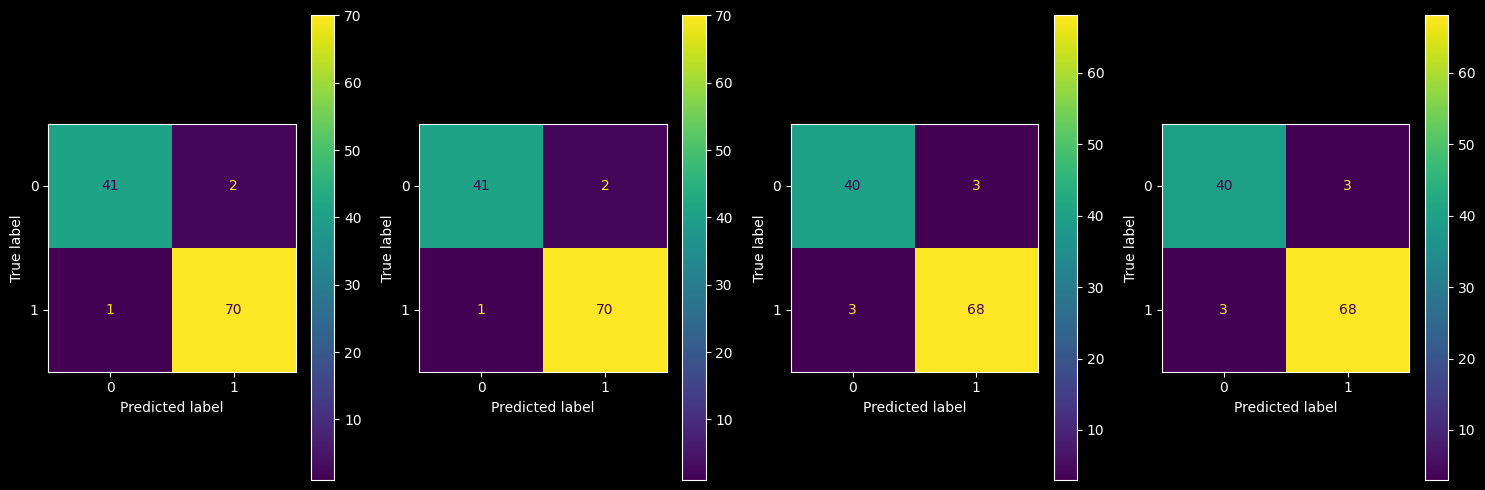

In [30]:
fig, ax = plt.subplots(1, 4, figsize=(15, 5))

ConfusionMatrixDisplay(cm_vot).plot(ax=ax[0])
ConfusionMatrixDisplay(cm_lr).plot(ax=ax[1])
ConfusionMatrixDisplay(cm_dt).plot(ax=ax[2])
ConfusionMatrixDisplay(cm_knn).plot(ax=ax[3])

plt.tight_layout()
plt.show()

## Bagging

- (모델) Bagging
- (대상) Bagging/randomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier

### Train

In [32]:
model_rf = RandomForestClassifier(random_state=RANDOM_STATE)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
model_rf.score(X_train, y_train)

1.0

### Predict

In [34]:
pred_rf = model_rf.predict(X_test)
accuracy_score(y_test, pred_rf)

0.9649122807017544

## Boosting

- (대상) AdaBoost, Gradient Boosting, XGB, LightGBM
- (모델) Boosting

In [35]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

### Train

In [36]:
model_ada = AdaBoostClassifier(random_state=RANDOM_STATE)
model_gb = GradientBoostingClassifier(random_state=RANDOM_STATE)
model_xgb = XGBClassifier(random_state=RANDOM_STATE)
model_lgb = LGBMClassifier(random_state=RANDOM_STATE)

In [37]:
model_ada.fit(X_train, y_train)
model_gb.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_lgb.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 286, number of negative: 169
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4540
[LightGBM] [Info] Number of data points in the train set: 455, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.628571 -> initscore=0.526093
[LightGBM] [Info] Start training from score 0.526093
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, 

LGBMClassifier(random_state=42)

In [38]:
print(
    model_ada.score(X_train, y_train),
    model_gb.score(X_train, y_train),
    model_xgb.score(X_train, y_train),
    model_lgb.score(X_train, y_train),
)

1.0 1.0 1.0 1.0


### Predict

In [39]:
pred_ada = model_ada.predict(X_test)
pred_gb = model_gb.predict(X_test)
pred_xgb = model_xgb.predict(X_test)
pred_lgb = model_lgb.predict(X_test)

In [40]:
print(
    accuracy_score(y_test, pred_ada),
    accuracy_score(y_test, pred_gb),
    accuracy_score(y_test, pred_xgb),
    accuracy_score(y_test, pred_lgb),
)

0.9736842105263158 0.956140350877193 0.956140350877193 0.9736842105263158


## Stacking

- (대상) Logistic Regression, Decision Tree, randomForest 
- (모델) Stacking

In [41]:
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC

### Train

In [42]:
model_base = [
    ("lr", LogisticRegression(random_state=RANDOM_STATE)),
    ("dt", DecisionTreeClassifier(random_state=RANDOM_STATE)),
    ("knn", KNeighborsClassifier()),
]

model_meta = SVC(random_state=RANDOM_STATE)

In [43]:
model_stack = StackingClassifier(
    estimators=model_base,
    final_estimator=model_meta,
    cv=CV_FOLDS,
)

model_stack.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier())],
                   final_estimator=SVC(random_state=42))

In [44]:
model_stack.score(X_train, y_train)

0.989010989010989

### Predict

In [45]:
pred_stack = model_stack.predict(X_test)
print(accuracy_score(y_test, pred_stack))

0.9736842105263158


# Results

In [46]:
models = [
    "Logistic Regression",
    "Decision Tree",
    "K-Neast Neighbors",
    "Voting",
    "Bagging",
    "Adaboost",
    "GradientBoost",
    "XGBoost",
    "lightGBM",
    "Stacking",
]

train_score = [
    model_lr.score(X_train, y_train),
    model_dt.score(X_train, y_train),
    model_knn.score(X_train, y_train),
    voting.score(X_train, y_train),
    model_rf.score(X_train, y_train),
    model_ada.score(X_train, y_train),
    model_gb.score(X_train, y_train),
    model_xgb.score(X_train, y_train),
    model_lgb.score(X_train, y_train),
    model_stack.score(X_train, y_train),
]

pred_score = [
    accuracy_score(y_test, pred_lr),
    accuracy_score(y_test, pred_dt),
    accuracy_score(y_test, pred_knn),
    accuracy_score(y_test, pred_voting),
    accuracy_score(y_test, pred_rf),
    accuracy_score(y_test, pred_ada),
    accuracy_score(y_test, pred_gb),
    accuracy_score(y_test, pred_xgb),
    accuracy_score(y_test, pred_lgb),
    accuracy_score(y_test, pred_stack),
]

In [47]:
df_results = pd.DataFrame(
    {
        "models": models,
        "train_score": train_score,
        "pred_score": pred_score,
    }
)

df_results

,models,train_score,pred_score
0,Logistic Regression,0.9868,0.9737
1,Decision Tree,1.0000,0.9474
2,K-Neast Neighbors,0.9802,0.9474
3,Voting,0.9956,0.9737
4,Bagging,1.0000,0.9649
5,Adaboost,1.0000,0.9737
6,GradientBoost,1.0000,0.9561
7,XGBoost,1.0000,0.9561
8,lightGBM,1.0000,0.9737
9,Stacking,0.9890,0.9737


In [48]:
# `train_score`와 `pred_score`의 절대값 차이 계산
df_results["score_diff"] = abs(df_results["train_score"] - df_results["pred_score"])

# 정렬 조건 : train_score 기준 1.0은 후순위
df_results["train_sort_key"] = df_results["train_score"].apply(
    lambda x: -x if x < 1.0 else float("inf")
)

# 정렬: `score_diff` -> `train_sort_key` -> `pred_score`
df_results_ = df_results.sort_values(
    by=["score_diff", "train_sort_key", "pred_score"], ascending=[True, True, False]
).drop(columns=["train_sort_key"])

df_results_

,models,train_score,pred_score,score_diff
0,Logistic Regression,0.9868,0.9737,0.0131
9,Stacking,0.9890,0.9737,0.0153
3,Voting,0.9956,0.9737,0.0219
5,Adaboost,1.0000,0.9737,0.0263
8,lightGBM,1.0000,0.9737,0.0263
2,K-Neast Neighbors,0.9802,0.9474,0.0329
4,Bagging,1.0000,0.9649,0.0351
6,GradientBoost,1.0000,0.9561,0.0439
7,XGBoost,1.0000,0.9561,0.0439
1,Decision Tree,1.0000,0.9474,0.0526


# End of Documents